In [215]:
from sympy import *
from sympy.physics.mechanics import *
from sympy.abc import t, s, g
init_vprinting()

In [216]:
m, M, l = symbols('m M l')
x, theta, F = dynamicsymbols('x theta F')

x_m = x - l * sin(theta)
y_m = l * cos(theta)

x_dot = diff(x, t)
x_ddot = diff(x_dot, t)
theta_dot = diff(theta, t)
theta_ddot = diff(theta_dot, t)
x_m_dot = diff(x_m, t)
x_m_ddot = diff(x_m_dot, t)
y_m_dot = diff(y_m, t)
y_m_ddot = diff(y_m_dot, t)

# Potential Energy
V = m*g*y_m
V.simplify()

In [217]:
# Kinetic Energy
T = .5*M*x_dot**2 + .5*m*(x_m_dot**2 + y_m_dot**2)
T.simplify()

In [218]:
# Lagrangian
L = T - V
L.simplify()

In [219]:
# Euler Lagrangian - Equations of Motion
eom_x = diff(diff(L, x_dot), t) - diff(L, x)
eom_x = eom_x - F
eom_x.simplify()

In [220]:
eom_theta = diff(diff(L, theta_dot), t) - diff(L, theta)
eom_theta.simplify()

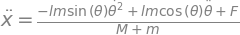

In [221]:
# Solve
sln_x_ddot = solve(eom_x, x_ddot)[0]
Eq(x_ddot, sln_x_ddot)

In [222]:
sln_theta_ddot = solve(eom_theta, theta_ddot)[0]
Eq(theta_ddot, sln_theta_ddot)

In [223]:
state = Matrix([x, x_dot, theta, theta_dot])
state_dot = diff(state, t)
Eq(state_dot, Matrix([x_dot, sln_x_ddot, theta_dot, sln_theta_ddot]))

      ⎡                ẋ                 ⎤
      ⎢                                  ⎥
      ⎢              2                   ⎥
⎡ẋ⎤   ⎢- l⋅m⋅sin(θ)⋅θ̇  + l⋅m⋅cos(θ)⋅θ̈ + F⎥
⎢ ⎥   ⎢──────────────────────────────────⎥
⎢ẍ⎥   ⎢              M + m               ⎥
⎢ ⎥ = ⎢                                  ⎥
⎢θ̇⎥   ⎢                θ̇                 ⎥
⎢ ⎥   ⎢                                  ⎥
⎣θ̈⎦   ⎢       g⋅sin(θ) + cos(θ)⋅ẍ        ⎥
      ⎢       ───────────────────        ⎥
      ⎣                l                 ⎦